In [1]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.circuit.library import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

# Simple gates

## Plus state

Input: A qubit in the state $|0\rangle$.

Goal: Change the state of the qubit to $|+\rangle$.

Solution: Apply the H-gate to the qubit.

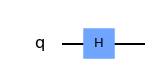

|initial>: [1.+0.j 0.+0.j]
|final>: [0.70710678+0.j 0.70710678+0.j]


In [7]:
# Initial state
sv = Statevector.from_label("0")

# Hadamard gate
circ = QuantumCircuit(1)
circ.h(0)
display(circ.draw("mpl"))

# Final state
new_sv = sv.evolve(circ)

print(f"|initial>: {sv.data}")
print(f"|final>: {new_sv.data}")

## Minus state

Input: A qubit in the state $|0\rangle$.

Goal: Change the state of the qubit to $|+\rangle$.

Solution: Apply the X-gate followed by the H-gate to the qubit.

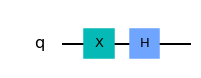

|initial>: [1.+0.j 0.+0.j]
|final>: [ 0.70710678+0.j -0.70710678+0.j]


In [8]:
# Initial state
sv = Statevector.from_label("0")

# Hadamard gate
circ = QuantumCircuit(1)
circ.x(0)
circ.h(0)
display(circ.draw("mpl"))

# Final state
new_sv = sv.evolve(circ)

print(f"|initial>: {sv.data}")
print(f"|final>: {new_sv.data}")

## Superposition of all basis vectors on two qubits.

Input: Two qubits in the state $|00\rangle$.

Goal: Change the two qubit state to $\frac{1}{2} (|00\rangle + |01\rangle + |10\rangle + |11\rangle)$.

Solution: Apply the H-gate to both the qubits.

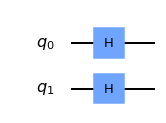

|initial>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
|final>: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


In [9]:
# Initial state
sv = Statevector.from_label("00")

# Hadamard gate
circ = QuantumCircuit(2)
circ.h([0, 1])
display(circ.draw("mpl"))

# Final state
new_sv = sv.evolve(circ)

print(f"|initial>: {sv.data}")
print(f"|final>: {new_sv.data}")

## Superposition of basis vectors with phase flip.

Input: Two qubits in the state $|00\rangle$.

Goal: Change the two qubit state to $\frac{1}{2} (|00\rangle + |01\rangle + |10\rangle - |11\rangle)$.

Solution: Apply the H-gate to both the qubits, followed by a Controlled Z-gate with the zeroth qubit as the control. Can be used as an oracle to mark the $|11\rangle$ state.

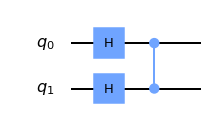

|initial>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
|final>: [ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]


In [10]:
# Initial state
sv = Statevector.from_label("00")

# Hadamard gate
circ = QuantumCircuit(2)
circ.h([0, 1])
circ.cz(0, 1)
display(circ.draw("mpl"))

# Final state
new_sv = sv.evolve(circ)

print(f"|initial>: {sv.data}")
print(f"|final>: {new_sv.data}")

## Superposition of basis vectors with phases.

Input: Two qubits in the state $|00\rangle$.

Goal: Change the two qubit state to $\frac{1}{2} (|00\rangle + i|01\rangle + |10\rangle - i|11\rangle)$.

Solution: Apply the H-gate to both the qubits, followed by a Controlled Y-gate with the zeroth qubit as the control, and a Controlled X-gate with the zeroth qubit as the control. 

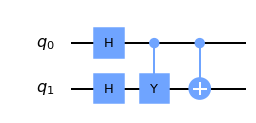

|initial>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
|final>: [0.5+0.j  0. +0.5j 0.5+0.j  0. -0.5j]


In [12]:
# Initial state
sv = Statevector.from_label("00")

# Hadamard gate
circ = QuantumCircuit(2)
circ.h([0, 1])
circ.cy(0, 1)
circ.cx(0, 1)
display(circ.draw("mpl"))

# Final state
new_sv = sv.evolve(circ)

print(f"|initial>: {sv.data}")
print(f"|final>: {new_sv.data}")

## Bell state $|\phi^+\rangle$.

Input: Two qubits in the state $|00\rangle$.

Goal: Change the two qubit state to $\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$.

Solution: Apply the H-gate to the zeroth qubit, followed by a Controlled X-gate with the zeroth qubit as the control. 

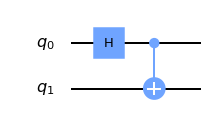

|initial>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
|final>: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [13]:
# Initial state
sv = Statevector.from_label("00")

# Hadamard gate
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
display(circ.draw("mpl"))

# Final state
new_sv = sv.evolve(circ)

print(f"|initial>: {sv.data}")
print(f"|final>: {new_sv.data}")

## All Bell states.

Input: Two qubits in the state $|00\rangle$, and an integer index

Goal: Change the two qubit state to one of the Bell States, depending on the index:

| Index | Bell State |
| --- | --- |
| 0 | $|\phi^+\rangle$ |
| 1 | $|\phi^-\rangle$ |
| 2 | $|\psi^+\rangle$ |
| 3 | $|\psi^-\rangle$ |

Solution: For $|\phi^+\rangle$, we can use the same circuit as before. The other three Bell states require additional steps:

| Bell State | Circuit |
| --- | :--- |
| $|\phi^-\rangle$ | $|\phi^+\rangle$ followed by a Z-gate on either of the qubits. | 
| $|\psi^+\rangle$ | $|\phi^+\rangle$ followed by a X-gate on the zeroth qubit. |
| $|\psi^-\rangle$ | $|\psi^+\rangle$ followed by a Z-gate on the first qubit. |

In [16]:
def bell(index):
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.cx(0, 1)

    if index == 1:
        circ.z(0)
    elif index >= 2:
        circ.x(0)
        if index == 3:
            circ.z(1)

    return circ

In [17]:
# Initial state
sv = Statevector.from_label("00")

# Bell states
phi_plus = sv.evolve(bell(0))
phi_minus = sv.evolve(bell(1))
psi_plus = sv.evolve(bell(2))
psi_minus = sv.evolve(bell(3))

print(f"|zero>: {sv.data}")
print(f"|phi+>: {phi_plus.data}")
print(f"|phi->: {phi_minus.data}")
print(f"|psi+>: {psi_plus.data}")
print(f"|psi->: {psi_minus.data}")

|zero>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
|phi+>: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
|phi->: [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
|psi+>: [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
|psi->: [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


## Greenberger–Horne–Zeilinger (GHZ) state.

Input: $N (N \ge 1)$ qubits in the the $|0 \ldots 0\rangle$ state.

Output: The GHZ state: $\frac{1}{\sqrt{2}} (|0 \ldots 0\rangle + |1 \ldots 1\rangle)$.

Solution: This is a generalization of the Bell state $|\phi^+\rangle$, and that suggests that we can create this in a similar fashion. We will apply the H-gate to the zeroth qubit, to put it in to the equally superposed state, and then apply $N-1$ CNOT-gates with the zeroth qubit as the control and the first to the $(N-1)$ th qubits as the targets. 

In [18]:
def ghz(nqubits):
    circ = QuantumCircuit(nqubits)
    circ.h(0)

    for i in range(1, nqubits):
        circ.cx(0, i)

    return circ

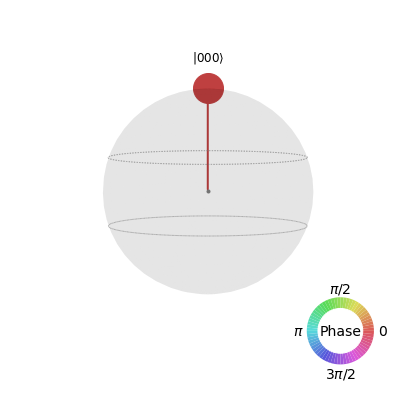

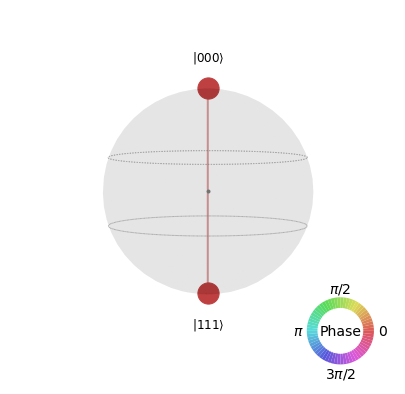

In [19]:
## 3 qubit GHZ state

# initial state
sv = Statevector.from_label("000")

# GHZ state
ghz_3 = sv.evolve(ghz(3))

display(plot_state_qsphere(sv))
display(plot_state_qsphere(ghz_3))